In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create set of random lattitude and longitude
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)
langs=np.random.uniform(low=-90.000,high=90.000,size=1500)
lat_langs=zip(lats,langs)
lat_langs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_langs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-50.95870037534938 -38.304686942798924
-82.93116225703277 -86.82076504033571
58.41695976432956 46.53833685098692
-56.270137203330165 51.82349681903531
43.407548871359154 17.858346677670838
-72.77873809990996 -66.13731403414288
-69.90317530894076 76.66584017532233
30.200718768787013 -80.82159223142806
-43.198948895290705 -70.44652541232293
-14.925194679173032 51.63850777803472
-20.641406114361573 -81.83659296005047
48.94326981555156 -38.31053005448934
47.05334571009803 -29.66474774862595
73.48360591465672 23.509047464516314
10.009142087694556 61.50562336303557
37.43945376843497 20.994332167367517
-8.56420215743988 -16.906008732710717
-8.565269626867206 -81.24342138585403
49.02593180806227 -52.555224576461
-8.192310906449961 -41.17984128374641
-53.54115596669478 13.14661395836444
51.04983513179579 39.19149794713985
62.83333997652403 15.598873398986925
-69.23900669715675 -24.68806704913129
-35.22199107664162 -49.8084884570656
-16.506910030677716 -63.81038585488089
24.248425947921135 73.48

In [5]:
from citipy import citipy

In [6]:
#create a list for holding a city
cities=[]
#identify the nearest city for each longitude and llatitude
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #if the city is unique we will add in city llist
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

602

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
#import requests and weather api key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
#build the url for openweathermap
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#url ="https://api.openweathermap.org/data/2.5/weather?la&appid=&units=Imperial" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ponazyrevo
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | potoci
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | palm valley
Processing Record 8 of Set 1 | san carlos de bariloche
Processing Record 9 of Set 1 | antalaha
Processing Record 10 of Set 1 | marcona
City not found. Skipping...
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | havoysund
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | kalamakion
City not found. Skipping...
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | chicama
Processing Record 18 of Set 1 | bonavista
Processing Record 19 of Set 1 | simoes
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of S

Processing Record 34 of Set 4 | sonqor
Processing Record 35 of Set 4 | tarudant
City not found. Skipping...
Processing Record 36 of Set 4 | hambantota
Processing Record 37 of Set 4 | miranorte
City not found. Skipping...
Processing Record 38 of Set 4 | keroka
Processing Record 39 of Set 4 | yazman
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | hobyo
Processing Record 42 of Set 4 | geresk
City not found. Skipping...
Processing Record 43 of Set 4 | virginia beach
Processing Record 44 of Set 4 | nantucket
Processing Record 45 of Set 4 | araouane
Processing Record 46 of Set 4 | yambio
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | vorobyevka
Processing Record 49 of Set 4 | olafsvik
Processing Record 50 of Set 4 | yanam
Processing Record 1 of Set 5 | micco
Processing Record 2 of Set 5 | angoche
Processing Record 3 of Set 5 | port-gentil
Processing Record 4 of Set 5 | mabaruma
Processing Record 5 of Set 5 | cozumel
Processing Record 6 of Se

Processing Record 19 of Set 8 | barcelos
Processing Record 20 of Set 8 | moba
Processing Record 21 of Set 8 | dharmavaram
Processing Record 22 of Set 8 | udayagiri
Processing Record 23 of Set 8 | mlimba
Processing Record 24 of Set 8 | sao jose da coroa grande
Processing Record 25 of Set 8 | abancay
Processing Record 26 of Set 8 | mapiri
Processing Record 27 of Set 8 | saint-georges
Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | nara
Processing Record 30 of Set 8 | iqaluit
Processing Record 31 of Set 8 | shumyachi
Processing Record 32 of Set 8 | jaciara
Processing Record 33 of Set 8 | paita
Processing Record 34 of Set 8 | hvolsvollur
Processing Record 35 of Set 8 | oranjestad
Processing Record 36 of Set 8 | sabalgarh
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | myskhako
Processing Record 39 of Set 8 | aasiaat
Processing Record 40 of Set 8 | bonthe
Processing Record 41 of Set 8 | valenca
Processing Record 42 of Set 8 | senneterre
Pro

Processing Record 8 of Set 12 | mangrol
Processing Record 9 of Set 12 | udaipur
Processing Record 10 of Set 12 | kolhapur
Processing Record 11 of Set 12 | adre
Processing Record 12 of Set 12 | iracoubo
Processing Record 13 of Set 12 | winsford
Processing Record 14 of Set 12 | yopal
Processing Record 15 of Set 12 | imeni babushkina
Processing Record 16 of Set 12 | gravdal
Processing Record 17 of Set 12 | les cayes
Processing Record 18 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 19 of Set 12 | san martin
Processing Record 20 of Set 12 | pitimbu
Processing Record 21 of Set 12 | fatehpur
Processing Record 22 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 23 of Set 12 | sharjah
Processing Record 24 of Set 12 | baldone
Processing Record 25 of Set 12 | abnub
Processing Record 26 of Set 12 | ibra
Processing Record 27 of Set 12 | qaqortoq
Processing Record 28 of Set 12 | puerto leguizamo
Processing Record 29 of Set 12 | paradwip
City not found. Ski

In [11]:
#create a dataframe

#city=json.load(open('json_file.json'))
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

                          
                          

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,66.70,87,98,9.60,UY,2022-11-13 08:46:42
1,Ushuaia,-54.8000,-68.3000,47.86,46,0,1.14,AR,2022-11-13 08:46:43
2,Ponazyrevo,58.3578,46.3142,37.20,85,100,14.32,RU,2022-11-13 08:46:43
3,Potoci,43.4086,17.8786,53.11,62,75,2.30,BA,2022-11-13 08:46:43
4,Saint-Philippe,-21.3585,55.7679,80.19,70,18,6.04,RE,2022-11-13 08:46:44
5,Palm Valley,30.1775,-81.3876,69.91,89,100,8.66,US,2022-11-13 08:46:44
6,San Carlos De Bariloche,-41.1456,-71.3082,46.15,71,40,14.97,AR,2022-11-13 08:46:44
7,Antalaha,-14.9003,50.2788,82.17,59,23,16.28,MG,2022-11-13 08:46:45
8,Nanortalik,60.1432,-45.2371,26.91,94,100,17.27,GL,2022-11-13 08:46:45
9,Lagoa,39.0500,-27.9833,60.40,66,100,21.18,PT,2022-11-13 08:46:45


In [12]:
#assign the column 
new_col_order=["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_col_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-11-13 08:46:42,-33.6971,-53.4616,66.70,87,98,9.60
1,Ushuaia,AR,2022-11-13 08:46:43,-54.8000,-68.3000,47.86,46,0,1.14
2,Ponazyrevo,RU,2022-11-13 08:46:43,58.3578,46.3142,37.20,85,100,14.32
3,Potoci,BA,2022-11-13 08:46:43,43.4086,17.8786,53.11,62,75,2.30
4,Saint-Philippe,RE,2022-11-13 08:46:44,-21.3585,55.7679,80.19,70,18,6.04


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#scatter plot graph
# Extract relevant fields from the DataFrame for plotting.
scatterplot=["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[scatterplot]
city_data_df.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,-33.6971,66.70,87,98,9.60
1,-54.8000,47.86,46,0,1.14
2,58.3578,37.20,85,100,14.32
3,43.4086,53.11,62,75,2.30
4,-21.3585,80.19,70,18,6.04


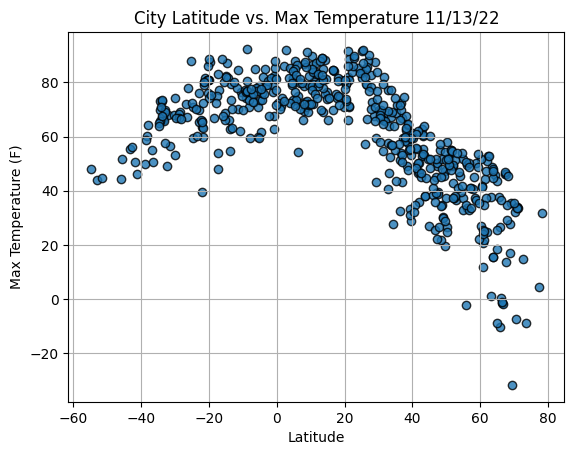

In [18]:
# Import time module
import time
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

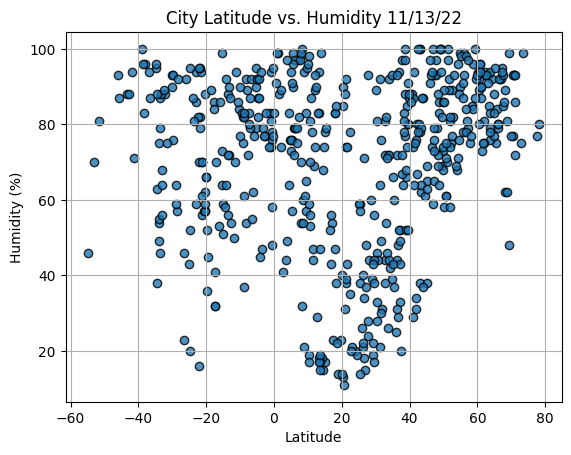

In [20]:
#define humidity
humidity=city_data_df["Humidity"]
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

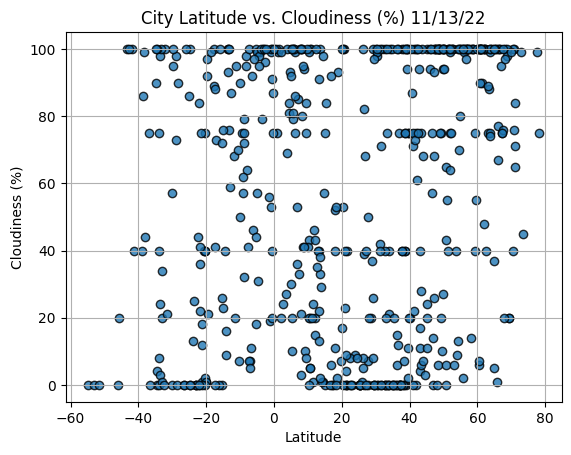

In [21]:
#define cloudiness
cloudiness=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

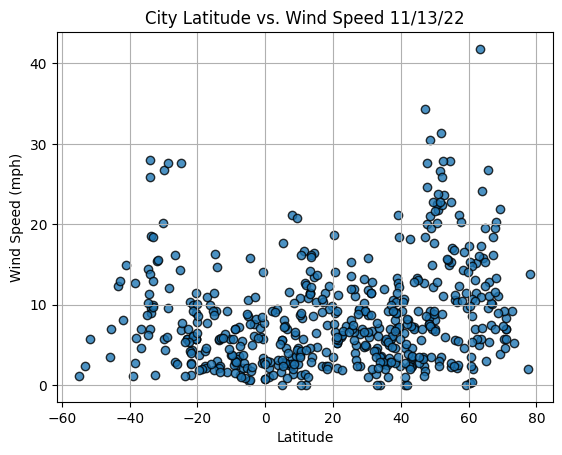

In [22]:
#define Wind speed
wind_speed=city_data_df["Wind Speed"]
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [24]:
#because we change the Dataframe in cell 14 we retrive the old dataframe from this code
city_data_df=pd.DataFrame(city_data)
new_col_order=["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_col_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-11-13 08:46:42,-33.6971,-53.4616,66.70,87,98,9.60
1,Ushuaia,AR,2022-11-13 08:46:43,-54.8000,-68.3000,47.86,46,0,1.14
2,Ponazyrevo,RU,2022-11-13 08:46:43,58.3578,46.3142,37.20,85,100,14.32
3,Potoci,BA,2022-11-13 08:46:43,43.4086,17.8786,53.11,62,75,2.30
4,Saint-Philippe,RE,2022-11-13 08:46:44,-21.3585,55.7679,80.19,70,18,6.04


In [25]:
index13=city_data_df.loc[13]
index13

City                      Chicama
Country                        PE
Date          2022-11-13 08:46:46
Lat                       -7.8447
Lng                      -79.1469
Max Temp                    59.54
Humidity                       89
Cloudiness                     64
Wind Speed                   3.56
Name: 13, dtype: object

In [26]:
#filter the value of the database based on the row
city_data_df["Lat"] >=0

0      False
1      False
2       True
3       True
4      False
       ...  
538     True
539    False
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [27]:
#if we want all data with greaterthan 0 latitude we use loc metod
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ponazyrevo,RU,2022-11-13 08:46:43,58.3578,46.3142,37.20,85,100,14.32
3,Potoci,BA,2022-11-13 08:46:43,43.4086,17.8786,53.11,62,75,2.30
5,Palm Valley,US,2022-11-13 08:46:44,30.1775,-81.3876,69.91,89,100,8.66
8,Nanortalik,GL,2022-11-13 08:46:45,60.1432,-45.2371,26.91,94,100,17.27
9,Lagoa,PT,2022-11-13 08:46:45,39.0500,-27.9833,60.40,66,100,21.18
10,Havoysund,NO,2022-11-13 08:46:45,70.9963,24.6622,34.03,72,84,8.32
11,Salalah,OM,2022-11-13 08:46:46,17.0151,54.0924,84.29,54,0,10.36
12,Georgetown,MY,2022-11-13 08:44:46,5.4112,100.3354,87.73,76,20,8.05
14,Bonavista,CA,2022-11-13 08:46:46,48.6499,-53.1147,34.79,83,100,30.44
17,Ostrogozhsk,RU,2022-11-13 08:46:47,50.8664,39.0756,52.12,61,43,21.81


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

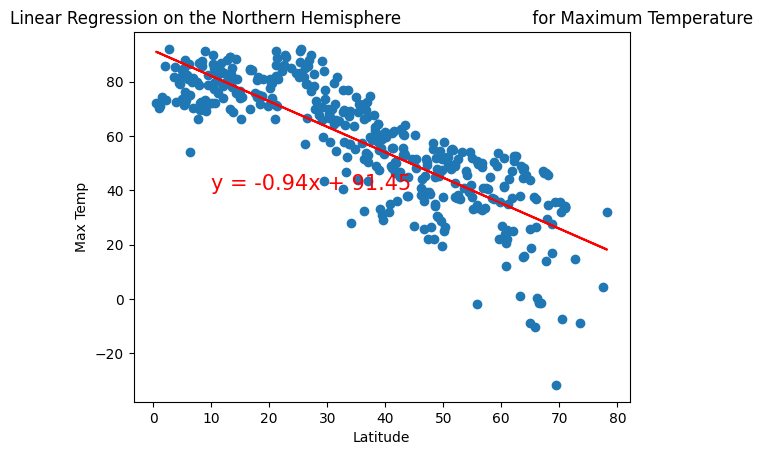

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



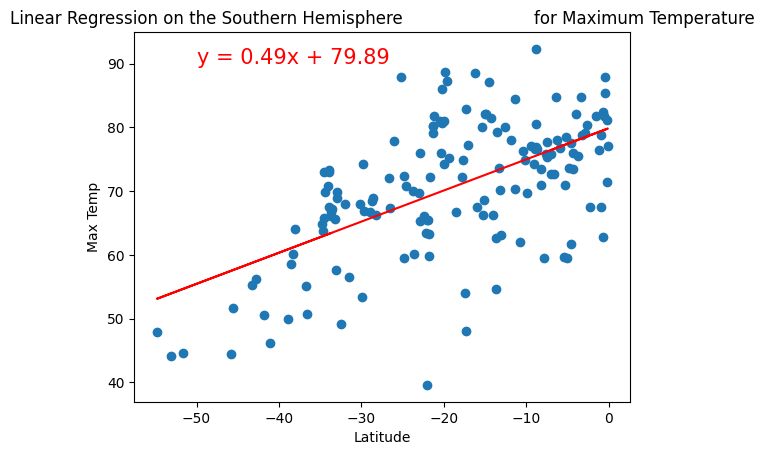

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

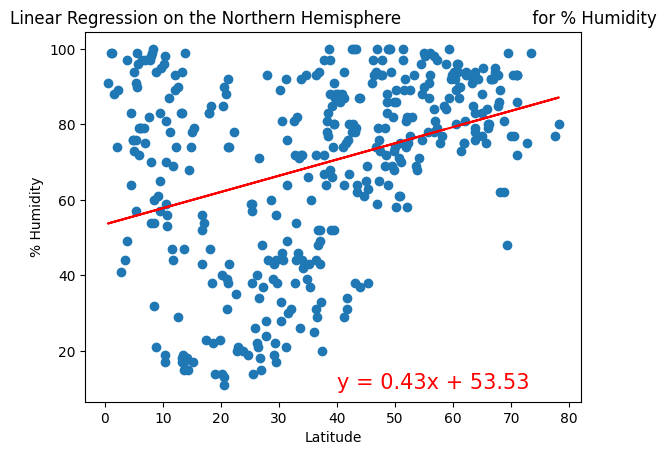

In [31]:
#linear regression by humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

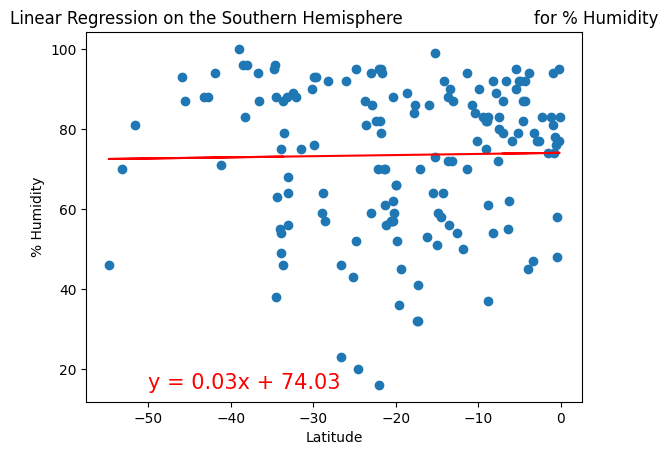

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

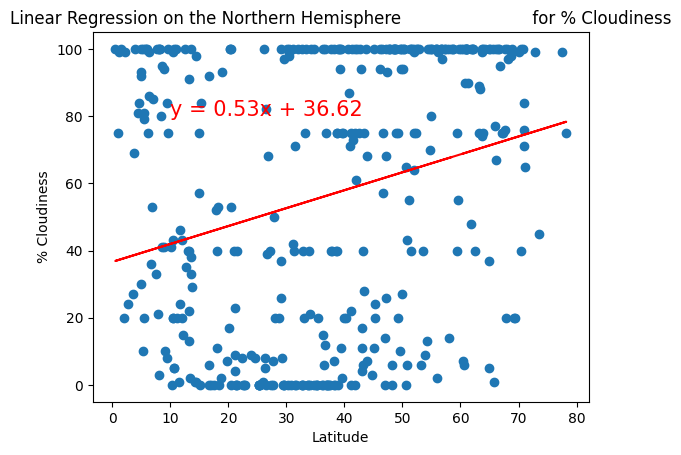

In [33]:
##linear regression by cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,80))

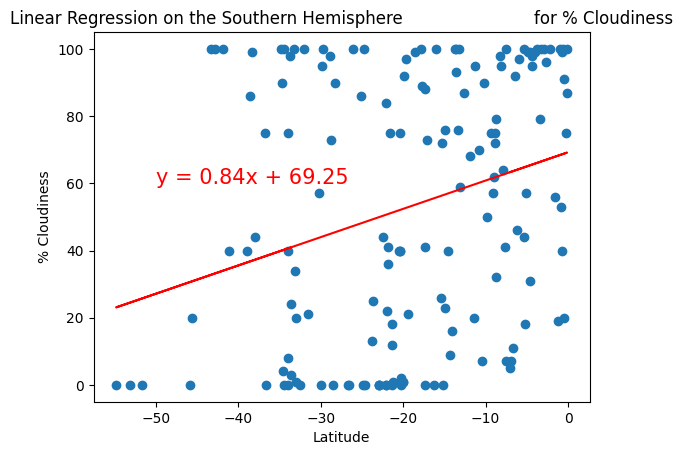

In [34]:
#linear regression by humidity
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

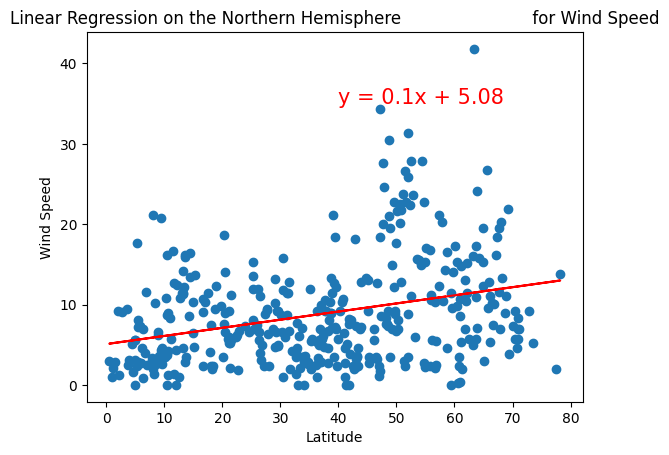

In [35]:
#linear regression on wind speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

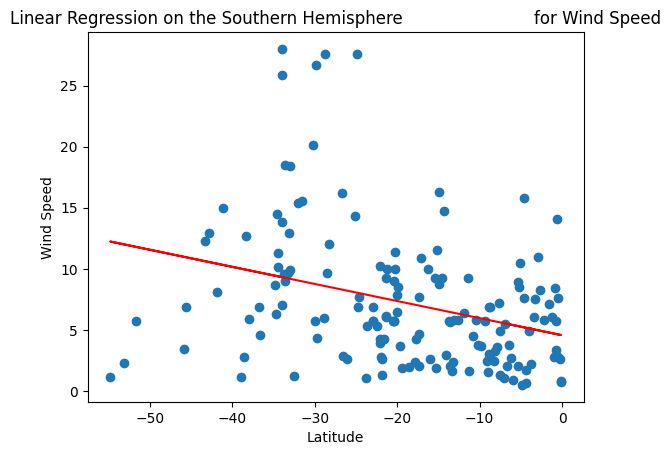

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))